# Bank marketing dataset analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read Train Data

In [2]:
data_train = pd.read_csv("bank-additional-full.csv", na_values =['NA'])
columns = data_train.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
data_train = data_train.values
data_train = [items[0].split(';') for items in data_train]
data_train = pd.DataFrame(data_train,columns = columns)

data_train['job'] = data_train['job'].str.replace('"', '')
data_train['marital'] = data_train['marital'].str.replace('"', '')
data_train['education'] = data_train['education'].str.replace('"', '')
data_train['default'] = data_train['default'].str.replace('"', '')
data_train['housing'] = data_train['housing'].str.replace('"', '')
data_train['loan'] = data_train['loan'].str.replace('"', '')
data_train['contact'] = data_train['contact'].str.replace('"', '')
data_train['month'] = data_train['month'].str.replace('"', '')
data_train['day_of_week'] = data_train['day_of_week'].str.replace('"', '')
data_train['poutcome'] = data_train['poutcome'].str.replace('"', '')
data_train['y'] = data_train['y'].str.replace('"', '')

In [3]:
data_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


### Read Test Data

In [4]:
data_test = pd.read_csv("bank-additional.csv", na_values =['NA'])
data_test = data_test.values
data_test = [items[0].split(';') for items in data_test]
data_test = pd.DataFrame(data_test,columns = columns)

data_test['job'] = data_test['job'].str.replace('"', '')
data_test['marital'] = data_test['marital'].str.replace('"', '')
data_test['education'] = data_test['education'].str.replace('"', '')
data_test['default'] = data_test['default'].str.replace('"', '')
data_test['housing'] = data_test['housing'].str.replace('"', '')
data_test['loan'] = data_test['loan'].str.replace('"', '')
data_test['contact'] = data_test['contact'].str.replace('"', '')
data_test['month'] = data_test['month'].str.replace('"', '')
data_test['day_of_week'] = data_test['day_of_week'].str.replace('"', '')
data_test['poutcome'] = data_test['poutcome'].str.replace('"', '')
data_test['y'] = data_test['y'].str.replace('"', '')


In [5]:
data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


### Preprocessing the data

In [6]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [7]:
data = pd.concat([data_train, data_test])
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)


### Checking for null values

In [8]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Data Visualization

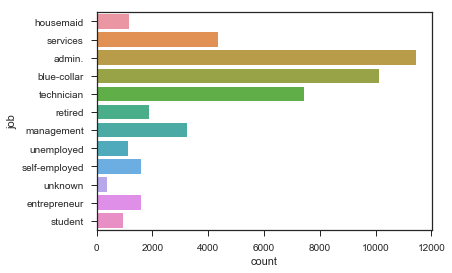

In [10]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)


In [11]:
data = data[data.job != 'unknown']

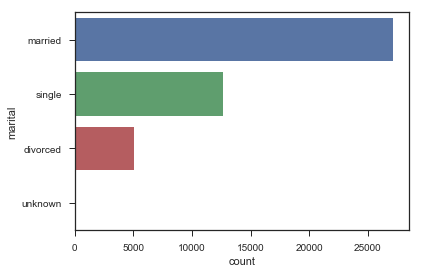

In [12]:
sns.countplot(y='marital', data=data)

In [13]:
data.marital.value_counts()

married     27175
single      12638
divorced     5043
unknown        82
Name: marital, dtype: int64

In [14]:
data = data[data.marital != 'unknown']
data = data[data.loan != 'unknown']

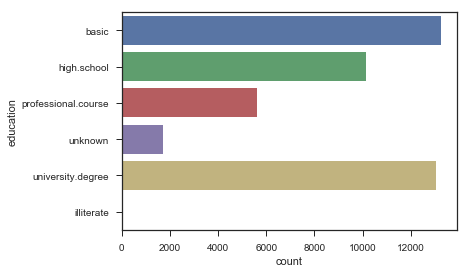

In [15]:
sns.countplot(y='education', data=data)

In [16]:
data = data[data.education != 'illiterate']

In [17]:
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,43748,43748,43748,43748,43748,43748,43748,43748,43748,43748,...,43748,43748,43748,43748,43748,43748,43748,43748,43748,43748
unique,78,11,3,5,3,2,2,2,10,5,...,41,27,8,3,10,26,26,316,11,2
top,31,admin.,married,basic,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,2079,11174,26508,13231,34778,23514,36912,27915,14595,9160,...,18731,42139,37748,37748,17239,8157,8157,3027,17239,38828


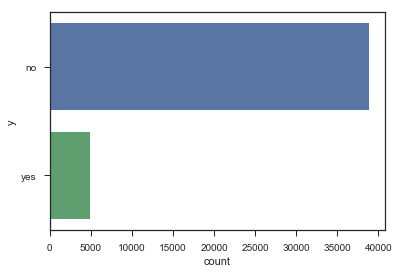

In [18]:
sns.countplot(y='y', data=data)

From the above Picture, We can say that the data is imbalanced

In [19]:
data = categorize(data)
data = data.convert_objects(convert_numeric=True)

C:\Users\Akhil\AnaConda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


### Checking for outliers using boxplots

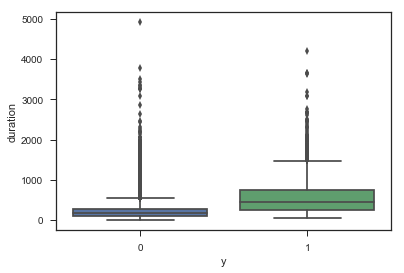

In [20]:
sns.boxplot(x='y', y='duration', data=data)

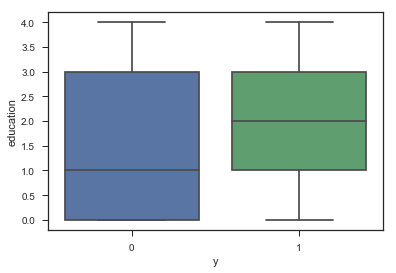

In [21]:
sns.boxplot(x='y', y='education', data=data)

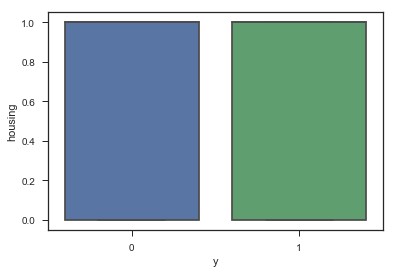

In [22]:
sns.boxplot(x='y', y='housing', data=data)

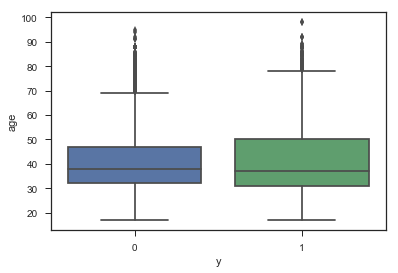

In [23]:
sns.boxplot(data['y'],data['age'])

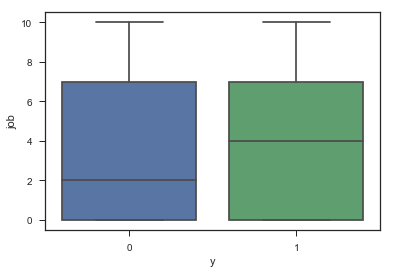

In [24]:
sns.boxplot(data['y'],data['job'])

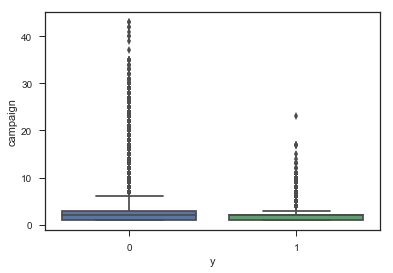

In [25]:
sns.boxplot(data['y'],data['campaign'])


### Removing outliers

In [26]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [27]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)


### Dropping less meaningful columns

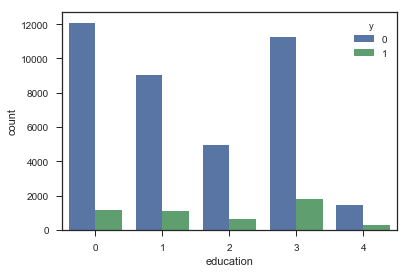

In [28]:
sns.countplot(x='education',hue='y',data=data)

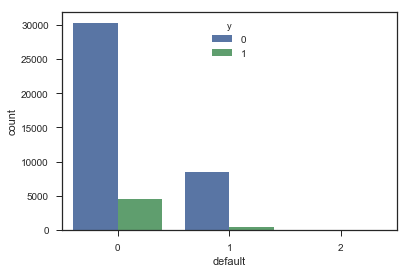

In [29]:
sns.countplot(x='default',hue='y',data=data)

It is skewed to 0. So We can drop this.

In [30]:
data = data.drop('default',axis=1)

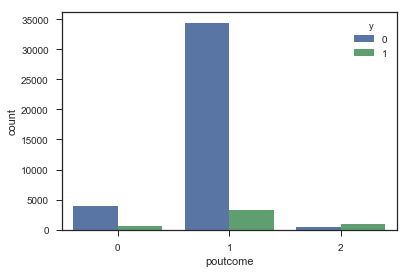

In [31]:
sns.countplot(x='poutcome',hue='y',data=data)

So many non existent values. We can drop this

In [32]:
data = data.drop('poutcome',axis=1)

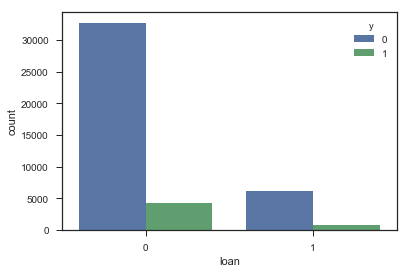

In [33]:
sns.countplot(x='loan',hue='y',data=data)

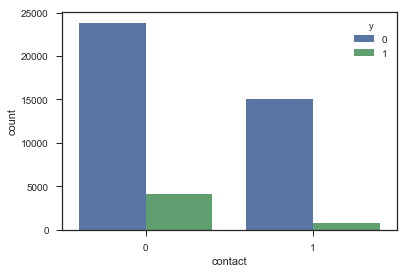

In [34]:
sns.countplot(x='contact',hue='y',data=data)

In [35]:
data = data.drop('contact',axis=1)

In [36]:
data = data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43748 entries, 0 to 4118
Data columns (total 13 columns):
age            43748 non-null float64
job            43748 non-null int64
marital        43748 non-null int64
education      43748 non-null int64
housing        43748 non-null int64
loan           43748 non-null int64
month          43748 non-null int64
day_of_week    43748 non-null int64
duration       43748 non-null float64
campaign       43748 non-null float64
pdays          43748 non-null int64
previous       43748 non-null int64
y              43748 non-null int64
dtypes: float64(3), int64(10)
memory usage: 5.9 MB


In [38]:
data.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,y
0,56.0,3,1,0,0,0,6,1,261.0,1.0,999,0,0
1,57.0,7,1,1,0,0,6,1,149.0,1.0,999,0,0
2,37.0,7,1,1,1,0,6,1,226.0,1.0,999,0,0
3,40.0,0,1,0,0,0,6,1,151.0,1.0,999,0,0
4,56.0,7,1,1,0,1,6,1,307.0,1.0,999,0,0


### Splitting into train and test data

In [39]:
X = data.drop('y',axis = 1).values
y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [41]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [42]:
X_train.shape

(32811, 10)

### Building different Models and validating using 10 fold cross validation

In [43]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

In [44]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.9035995662058859
LDA: 0.8985707323442396
KNN: 0.8959804395183542
Decison-Tree: 0.8750726255966388
Gaussian: 0.897686836904297
SVM: 0.9020756591465906
RandForest: 0.9044224674742637
ADA: 0.8990278171682992


## Logistic Regression obtained the highest accuracy with lesser runtime and is more stable in the results. Even SVM and Random Forest obtained the similar accuracy but have higher runtime compared to Logistic Regession.

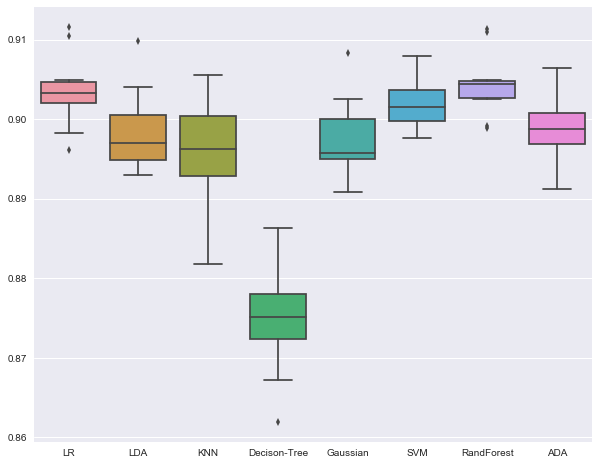

In [45]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)

### Testing with the test data

In [46]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [47]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [48]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.901252628692
Confusion Matrix : 
 [[9611  126]
 [ 954  246]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95      9737
          1       0.66      0.20      0.31      1200

avg / total       0.88      0.90      0.88     10937

